In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats

In [2]:

def get_entropy_dist_from_rep_mean(corruption_type_idx, corruption_level, rep_means):
    entropies = []
    dist_from_rep_means = []
    for epoch in range(0, 200, 10):
        file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
        path = os.path.join("data", "xent_save_reps2", "reps", file_name)
        data = np.load(path)

        dist_from_rep_mean = np.linalg.norm(data["representations"] - np.expand_dims(rep_means[epoch//10], 0), axis=1).mean()
        dist_from_rep_means.append(dist_from_rep_mean)

        entropy = scipy.stats.entropy(data["outputs"], axis=1).mean()
        entropies.append(entropy)
    return entropies, dist_from_rep_means



In [5]:
corruption_type_idx = 4
corruption_level = 0

rep_means = []
for epoch in range(0, 200, 10):
    file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
    path = os.path.join("data", "xent_save_reps2", "reps", file_name)
    data = np.load(path)
    rep_mean = data["representations"].mean(axis=0)
    rep_means.append(rep_mean)


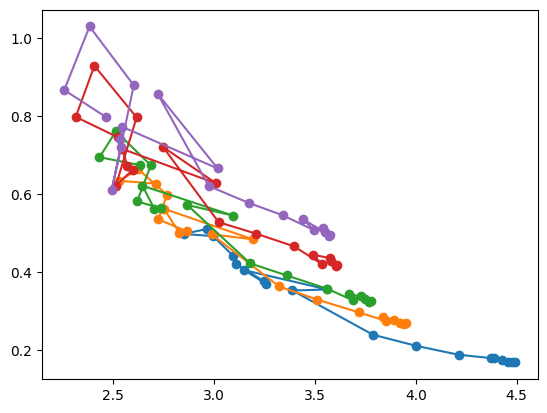

In [6]:
for corruption_level in range(5):
    entropies, dist_from_rep_means = get_entropy_dist_from_rep_mean(corruption_type_idx, corruption_level, rep_means)
    plt.plot(dist_from_rep_means[1:], entropies[1:], "o-", label="clevel {}".format(corruption_level))

# rep_means = np.array(rep_means)
# entropies = np.array(entropies)
# dist_from_rep_means = np.array(dist_from_rep_means)
# plt.plot(dist_from_rep_means[1:], entropies[1:], "o-")

In [3]:
corruption_type_idx = 4
corruption_level = 0

epoch = 190
file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
path = os.path.join("data", "xent_save_reps", "reps", file_name)
data = np.load(path)
rep_mean = data["representations"].mean(axis=0)

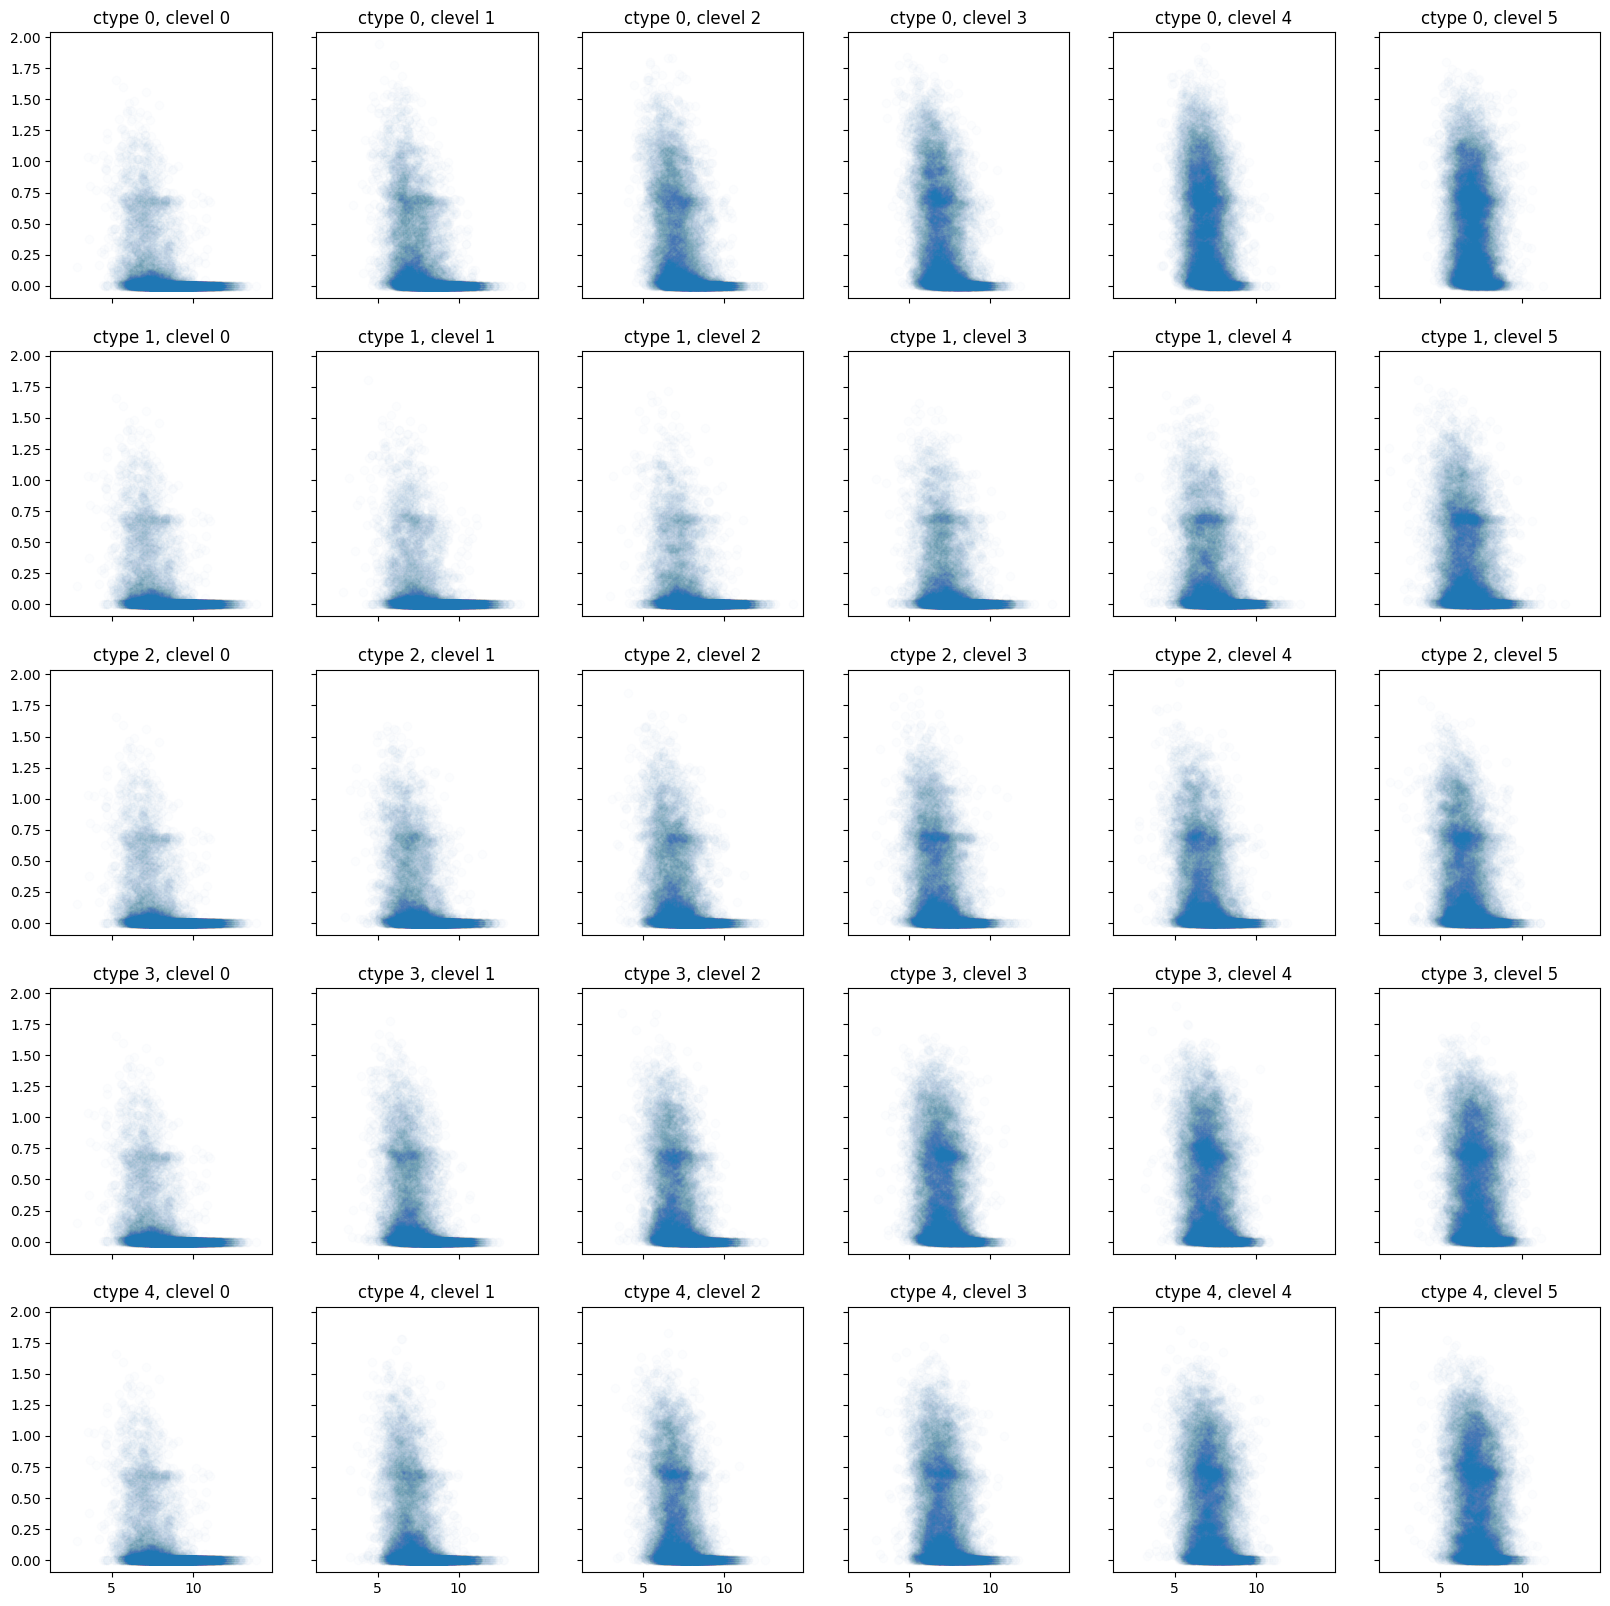

In [8]:
# make 5 x 6 plots
fig, axes = plt.subplots(5, 6, figsize=(20, 20), sharex=True, sharey=True)

for corruption_type_idx in range(5):
    for corruption_level in range(6):
        epoch = 190
        file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
        path = os.path.join("data", "xent_save_reps2", "reps", file_name)
        data = np.load(path)
        dist_from_rep_mean = np.linalg.norm(data["representations"], axis=1)
        entropy = scipy.stats.entropy(data["outputs"], axis=1)
        axes[corruption_type_idx, corruption_level].scatter(dist_from_rep_mean, entropy, alpha=0.01)
        axes[corruption_type_idx, corruption_level].set_title("ctype {}, clevel {}".format(corruption_type_idx, corruption_level))

In [135]:
corruption_type_idx = 4
corruption_level = 0

epoch = 190
file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
path = os.path.join("data", "xent_save_reps2", "reps", file_name)
data = np.load(path)
data["representations"].shape

(10000, 64)

In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(data["representations"])
pca.explained_variance_ratio_

array([0.20081431, 0.12984842, 0.10992324, 0.09011121, 0.08740296,
       0.07810581, 0.07442339, 0.0579083 , 0.04672485, 0.0282643 ])

In [137]:
pca.components_.shape

(10, 64)

In [138]:

projection_matrix =  np.dot(pca.components_.T, pca.components_)
data_mean = pca.mean_

In [139]:
normalized_data = (data["representations"] - data_mean)

norm = np.linalg.norm(np.dot(normalized_data, projection_matrix), axis=-1)
# norm = np.linalg.norm(np.dot(normalized_data, projection_matrix), axis=-1)

In [140]:
entropy = scipy.stats.entropy(data["outputs"], axis=1)

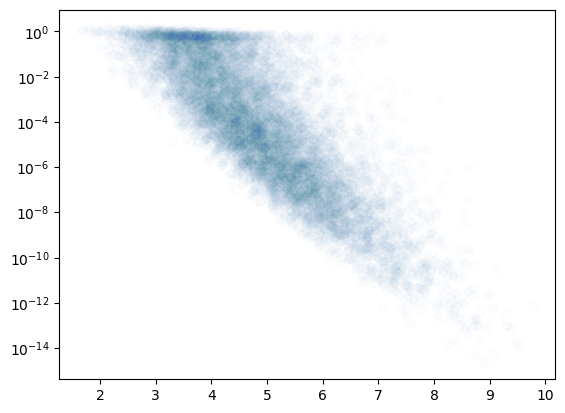

In [141]:
plt.scatter(norm, (entropy), alpha=0.01)

plt.yscale("log")

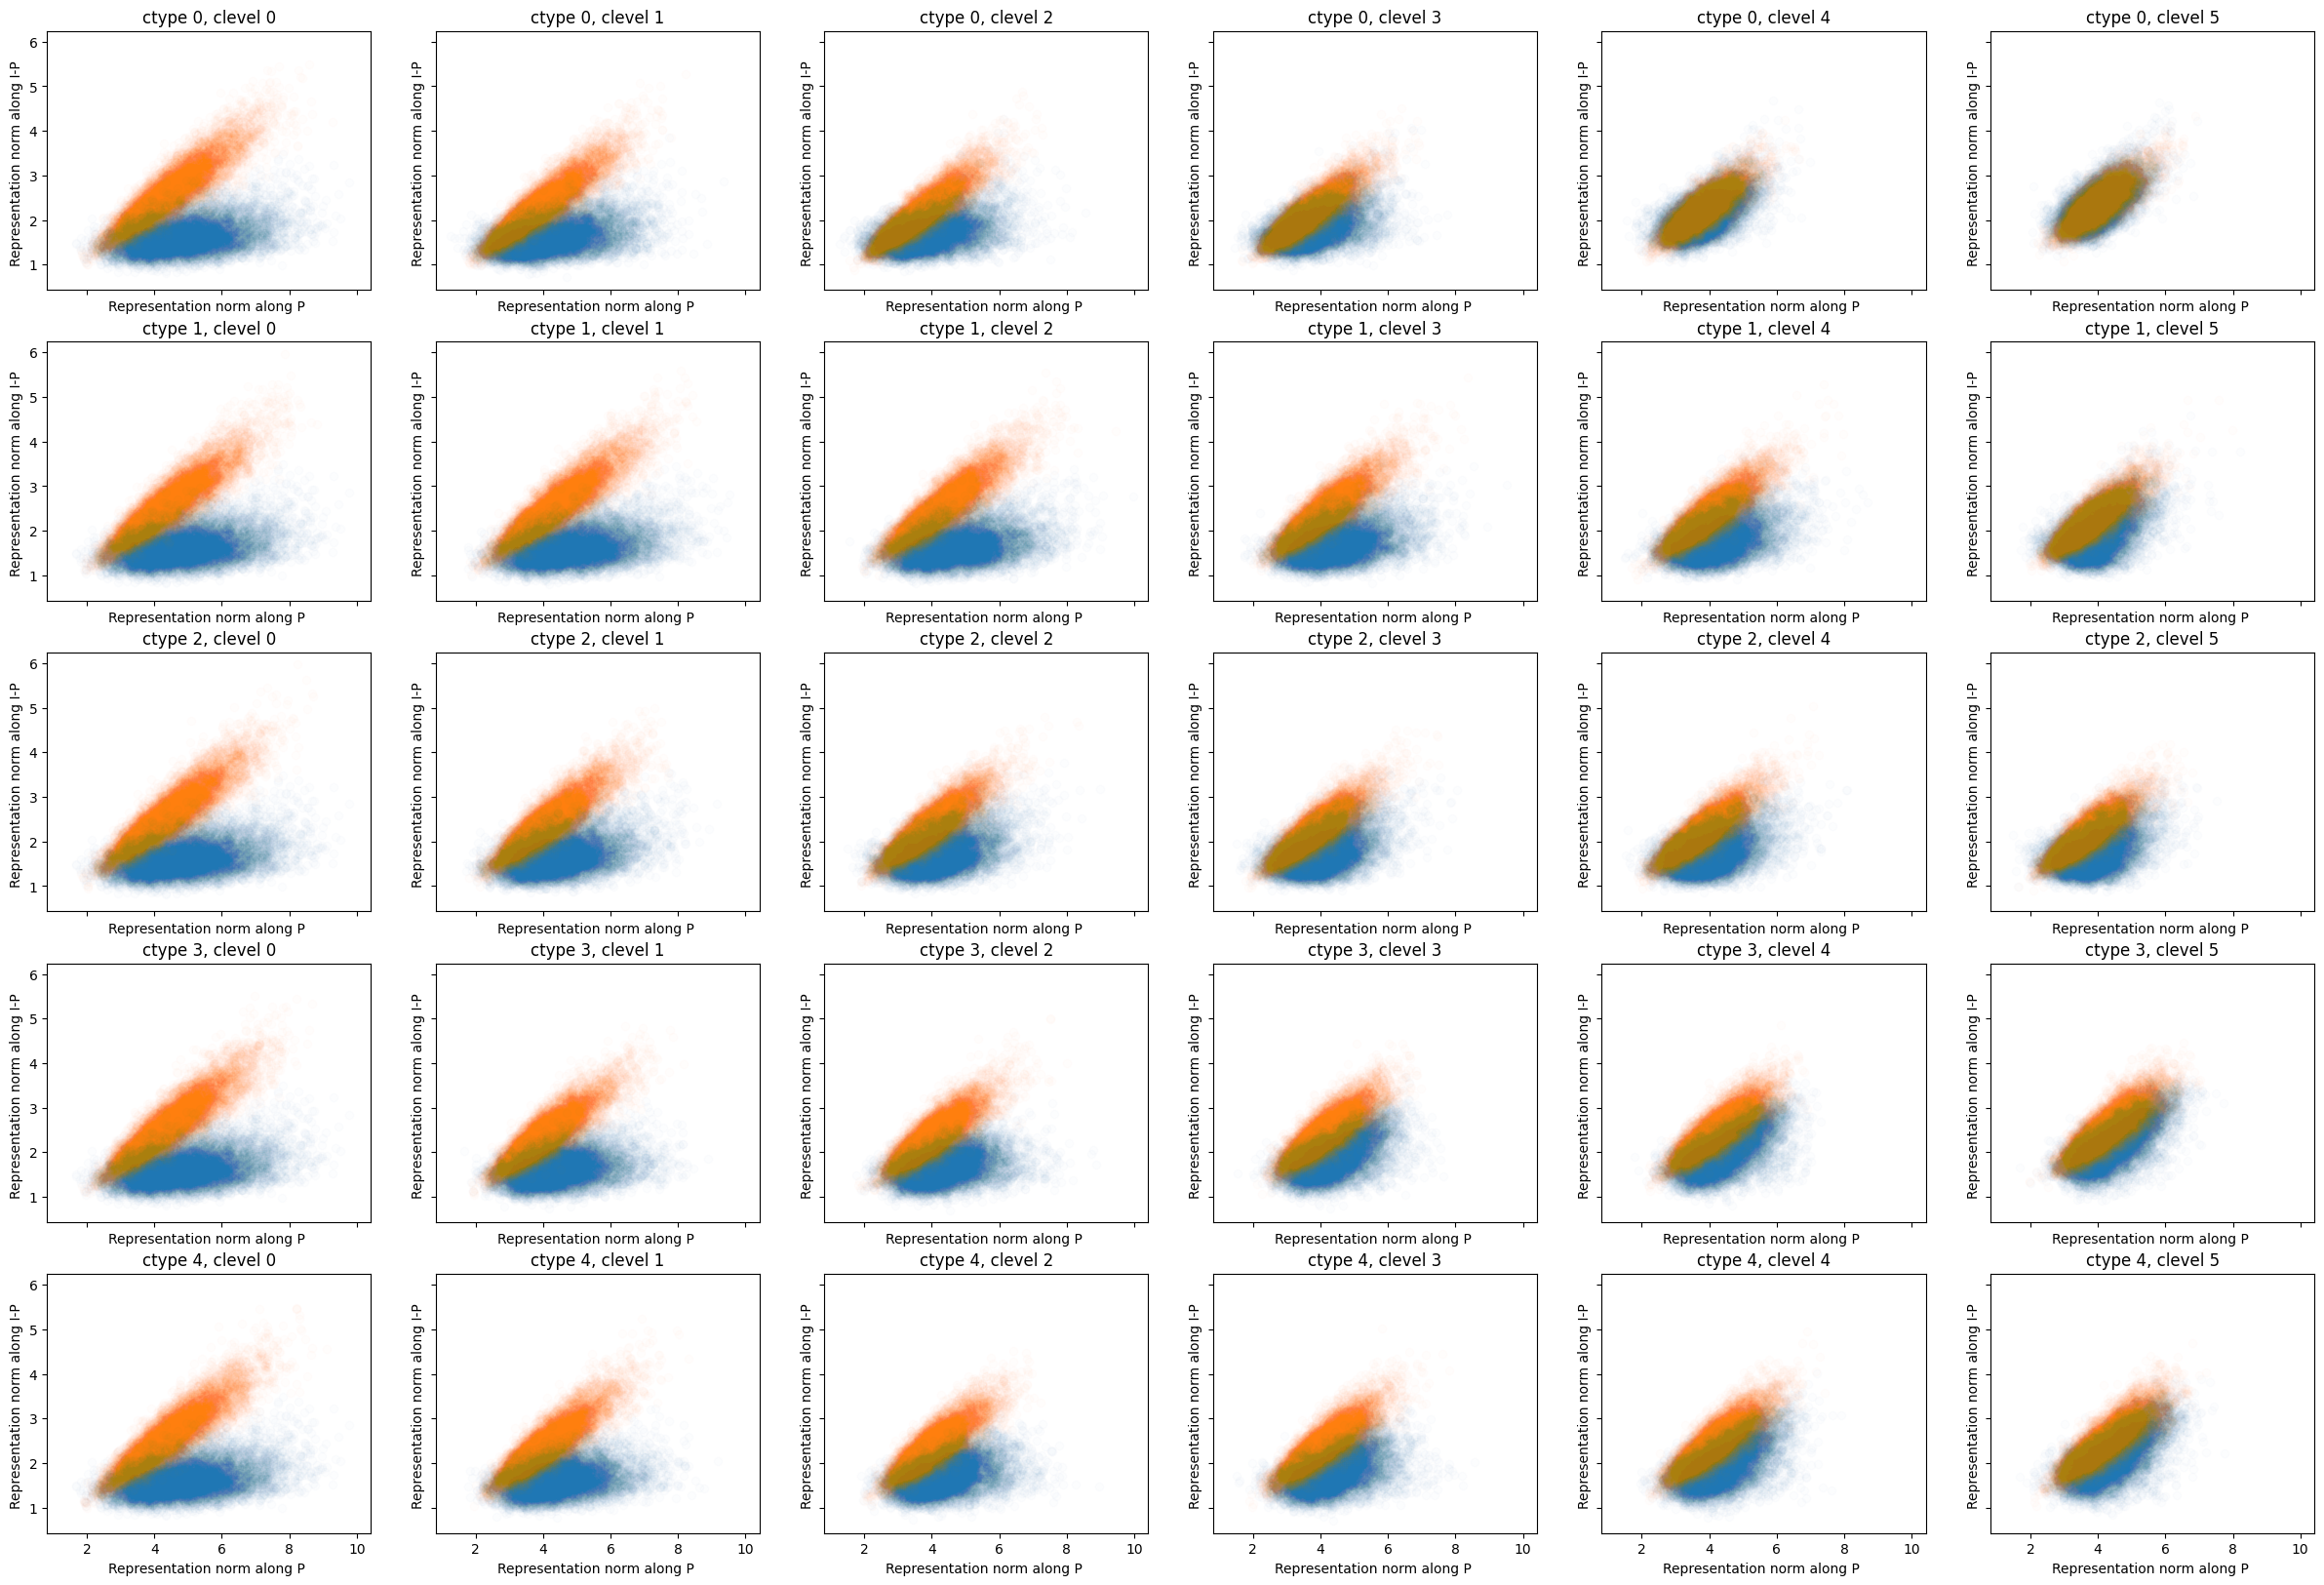

In [179]:
# make 5 x 6 plots



fig, axes = plt.subplots(5, 6, figsize=(30, 20), sharex=True, sharey=True)

for corruption_type_idx in range(5):
    for corruption_level in range(6):
        epoch = 190
        file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
        path = os.path.join("data", "xent_save_reps2", "reps", file_name)
        data = np.load(path)
        normalized_data = (data["representations"] - data_mean)
        normalized_data = normalized_data
        norm = np.linalg.norm(np.dot(normalized_data, projection_matrix), axis=-1)
        norm2 = np.linalg.norm(np.dot(normalized_data, np.eye(64) - projection_matrix), axis=-1)
        entropy = scipy.stats.entropy(data["outputs"], axis=1)
        axes[corruption_type_idx, corruption_level].scatter((norm), (norm2), alpha=0.01)
        # axes[corruption_type_idx, corruption_level].set_yscale("log")   
        axes[corruption_type_idx, corruption_level].set_title("ctype {}, clevel {}".format(corruption_type_idx, corruption_level))
        axes[corruption_type_idx, corruption_level].set_xlabel("Representation norm along P ")
        axes[corruption_type_idx, corruption_level].set_ylabel("Representation norm along I-P ")
        # axes[corruption_type_idx, corruption_level].set_ylabel("Entropy of output")

        random_data = np.random.uniform(0, 1, (10000, 64))
        random_data = random_data / np.linalg.norm(random_data, axis=-1, keepdims=True)
        random_data = random_data* np.random.choice(np.linalg.norm(normalized_data, axis=-1), (10000, 1))

        norm = np.linalg.norm(np.dot(random_data, projection_matrix), axis=-1)
        norm2 = np.linalg.norm(np.dot(random_data, np.eye(64) - projection_matrix), axis=-1)
        axes[corruption_type_idx, corruption_level].scatter((norm), (norm2), alpha=0.01)





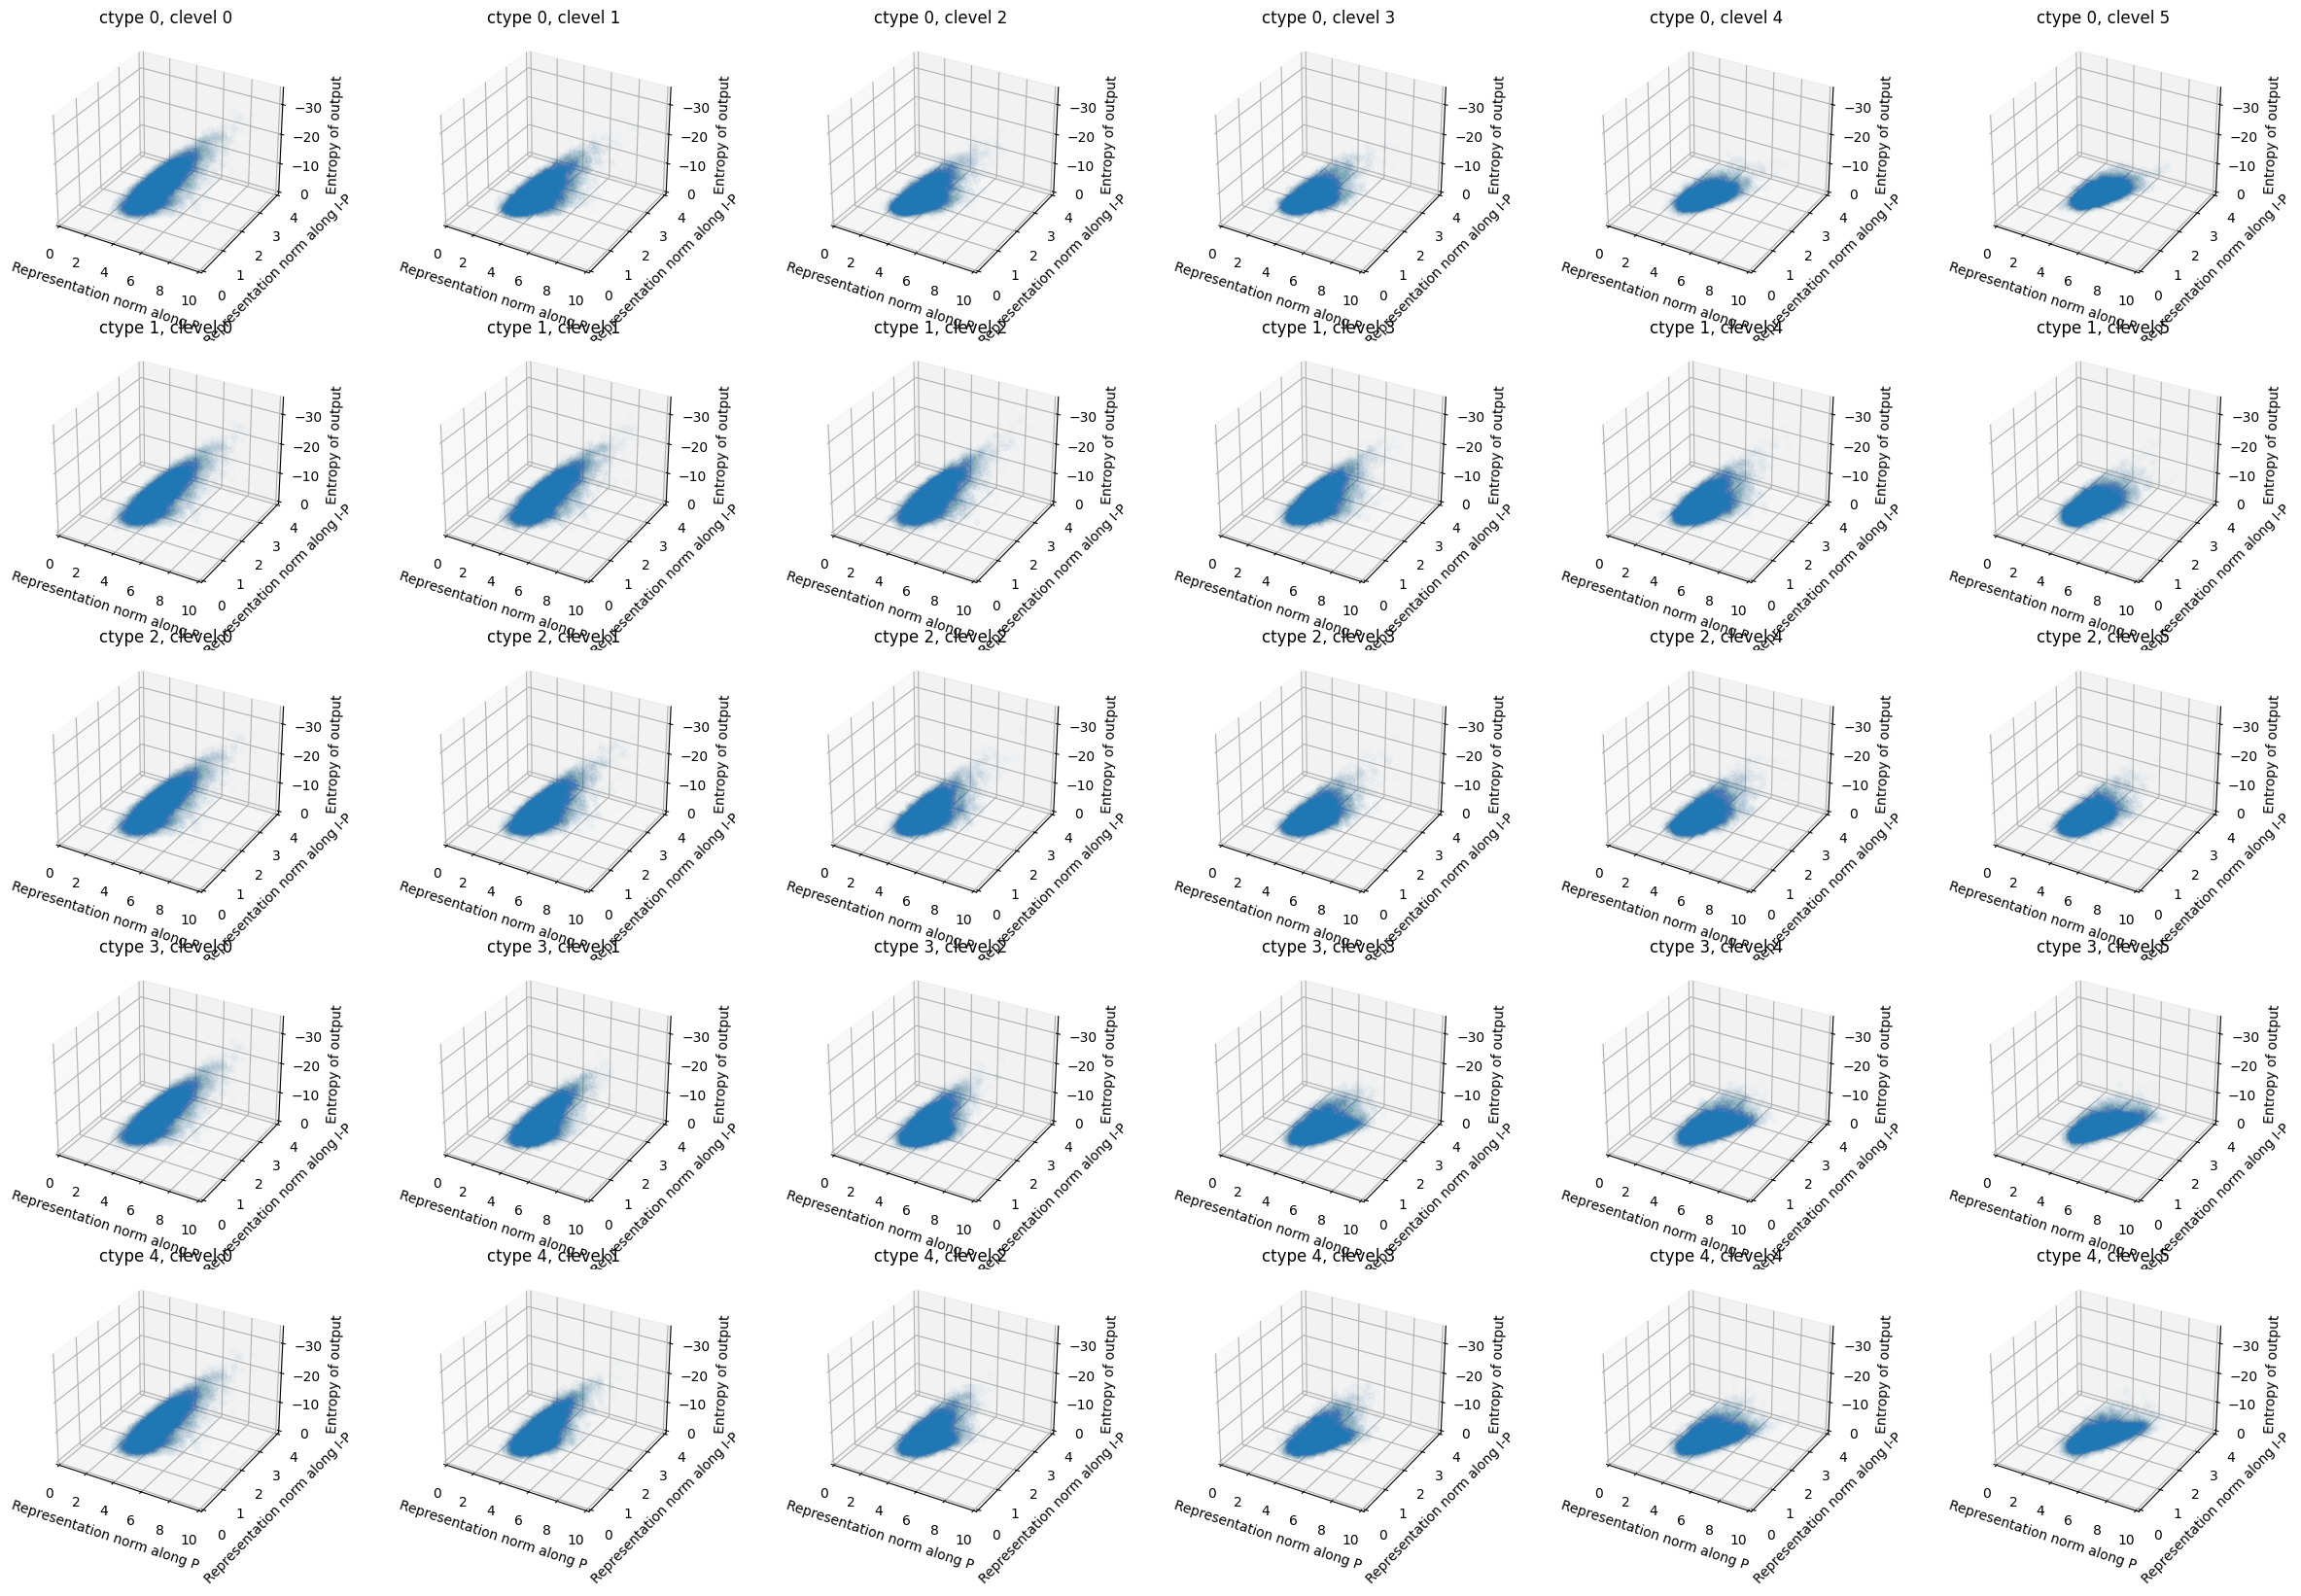

In [174]:

fig = plt.figure(figsize=(30, 20))




for corruption_type_idx in range(5):
    for corruption_level in range(6):
        ax = fig.add_subplot(5, 6, corruption_type_idx*6+corruption_level+1,  projection='3d')
        epoch = 190
        file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
        path = os.path.join("data", "xent_save_reps2", "reps", file_name)
        data = np.load(path)
        normalized_data = (data["representations"] - data_mean)
        normalized_data = normalized_data
        norm = np.linalg.norm(np.dot(normalized_data, projection_matrix), axis=-1)
        norm2 = np.linalg.norm(np.dot(normalized_data, np.eye(64) - projection_matrix), axis=-1)
        entropy = scipy.stats.entropy(data["outputs"], axis=1)

        ax.scatter(norm, norm2, np.log(entropy), alpha=0.01)
        # ax.set_zscale("log")
        ax.set_title("ctype {}, clevel {}".format(corruption_type_idx, corruption_level))
        ax.set_xlabel("Representation norm along P")
        ax.set_xlim(0, 10)
        ax.set_ylabel("Representation norm along I-P")
        ax.set_ylim(0, 4)
        ax.set_zlabel("Entropy of output")
        ax.set_zlim(0, -35)


Text(0.5, 0, 'Entropy of output')

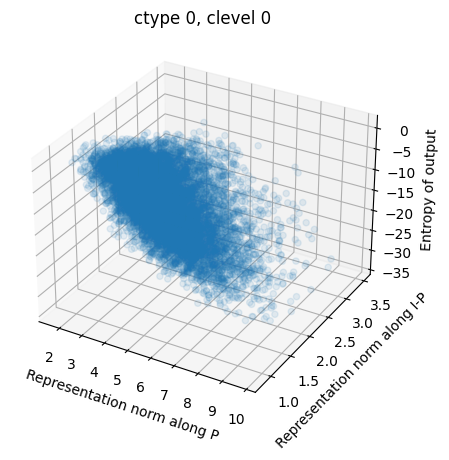

In [171]:

fig = plt.figure(figsize=(6, 5))

corruption_type_idx = 0
corruption_level = 0


ax = fig.add_subplot(1, 1, corruption_type_idx*6+corruption_level+1,  projection='3d')
epoch = 190
file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
path = os.path.join("data", "xent_save_reps2", "reps", file_name)
data = np.load(path)
normalized_data = (data["representations"] - data_mean)
normalized_data = normalized_data
norm = np.linalg.norm(np.dot(normalized_data, projection_matrix), axis=-1)
norm2 = np.linalg.norm(np.dot(normalized_data, np.eye(64) - projection_matrix), axis=-1)
entropy = scipy.stats.entropy(data["outputs"], axis=1)
ax.scatter(norm, norm2, np.log(entropy), alpha=0.1)
# ax.set_zscale("log")
ax.set_title("ctype {}, clevel {}".format(corruption_type_idx, corruption_level))
ax.set_xlabel("Representation norm along P")
ax.set_ylabel("Representation norm along I-P")
ax.set_zlabel("Entropy of output")

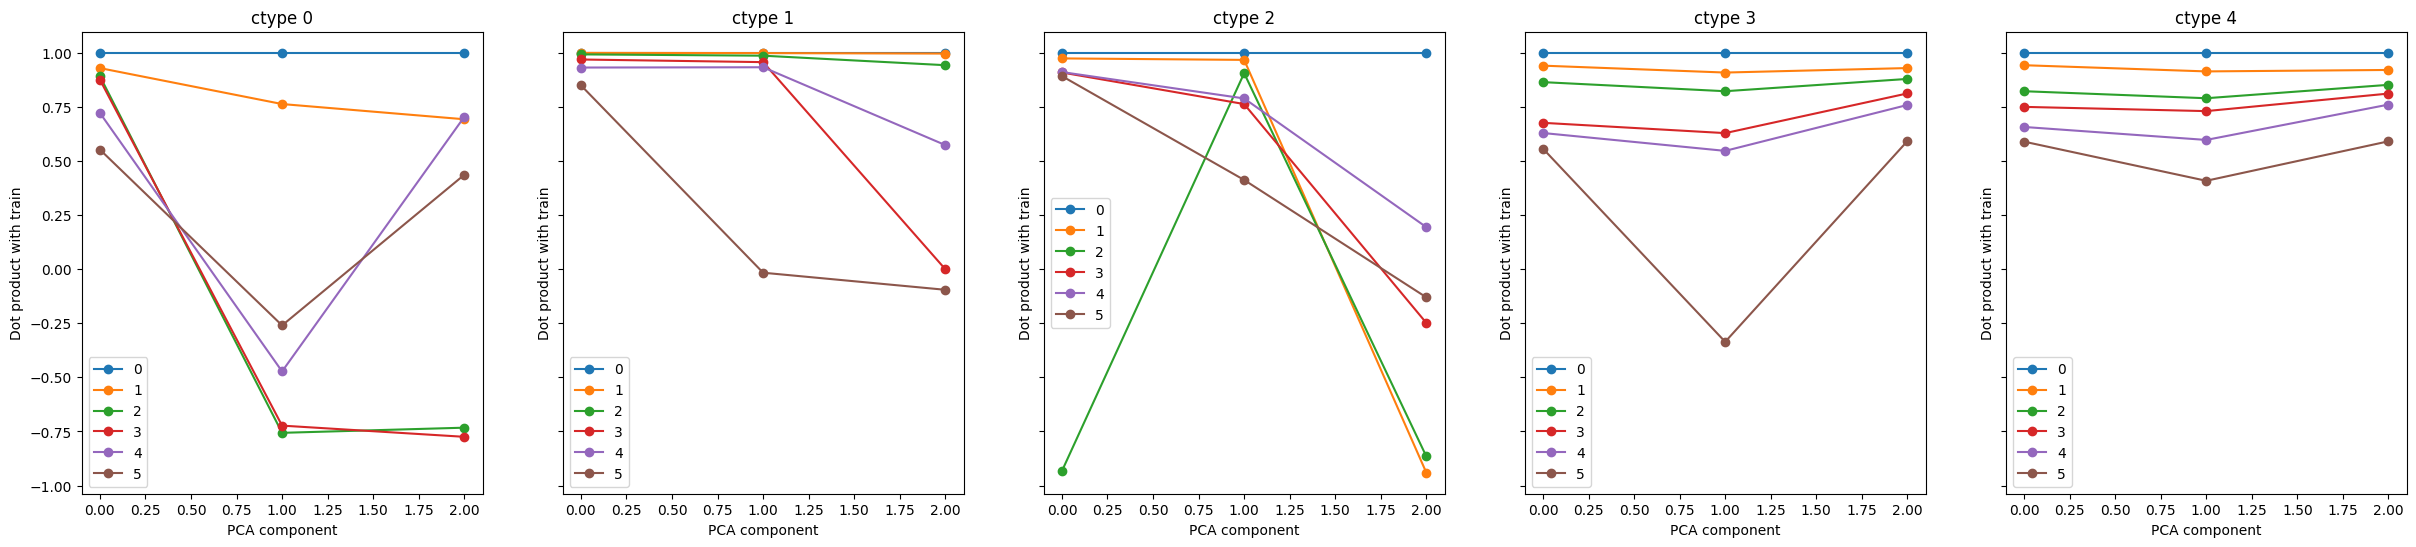

In [207]:
fig, axes = plt.subplots(1, 5, figsize=(30, 6), sharex=True, sharey=True)


for corruption_type_idx in range(5):
    corruption_level = 0
    epoch = 190
    file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
    path = os.path.join("data", "xent_save_reps2", "reps", file_name)
    data = np.load(path)
    pca = PCA(n_components=3)
    pca.fit(data["representations"])
    train_components = pca.components_
    for corruption_level in range(6):
        epoch = 190
        file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
        path = os.path.join("data", "xent_save_reps2", "reps", file_name)
        data = np.load(path)
        pca = PCA(n_components=3)
        pca.fit(data["representations"])
        np.sum(pca.components_*train_components, axis=-1)
        axes[corruption_type_idx].plot(np.arange(3), np.sum(pca.components_*train_components, axis=-1), "o-", label = str(corruption_level))
    # random_data = np.random.uniform(0, 1, (10000, 64))
    # pca = PCA(n_components=20)
    # pca.fit(random_data)
    # axes[corruption_type_idx].plot(np.arange(20), pca.singular_values_, "o-", label = "random")

    axes[corruption_type_idx].legend()
    axes[corruption_type_idx].set_title("ctype {}".format(corruption_type_idx))
    axes[corruption_type_idx].set_xlabel("PCA component")
    axes[corruption_type_idx].set_ylabel("Dot product with train")


In [196]:
from sklearn.linear_model import SGDClassifier

corruption_type_idx = 4
corruption_level = 0

epoch = 190
file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
path = os.path.join("data", "xent_save_reps2", "reps", file_name)
data = np.load(path)

pca = PCA(n_components=10)
pca.fit(data["representations"])

projection_matrix =  np.dot(pca.components_.T, pca.components_)
data_mean = pca.mean_

normalized_data = (data["representations"] - data_mean)

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(np.dot(normalized_data, np.eye(64) - projection_matrix), data["targets"])



/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(max_iter=5)

In [197]:
np.sum(clf.predict(np.dot(normalized_data,  np.eye(64) - projection_matrix)) == data["targets"]) / len(data["targets"])

0.1701

/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_ite

Text(0, 0.5, 'Accuracy')

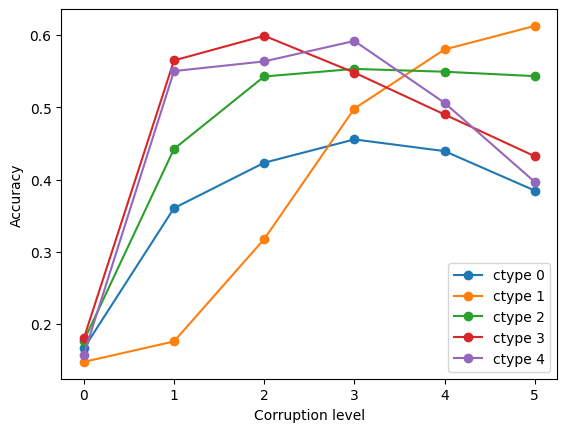

In [204]:

for corruption_type_idx in range(5):
    accuracy = []
    for corruption_level in range(6):

        epoch = 190
        file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
        path = os.path.join("data", "xent_save_reps2", "reps", file_name)
        data = np.load(path)

        normalized_data = (data["representations"] - data_mean)

        clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
        clf.fit(np.dot(normalized_data, np.eye(64) - projection_matrix), data["targets"])
        accuracy.append(np.sum(clf.predict(np.dot(normalized_data,  np.eye(64) - projection_matrix)) == data["targets"]) / len(data["targets"]))
    plt.plot(accuracy, "o-", label = "ctype {}".format(corruption_type_idx))
plt.legend()
plt.xlabel("Corruption level")
plt.ylabel("Accuracy")

In [208]:
import argparse
import os
import shutil
import time

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import resnet
from custom_datasets import CIFAR10C
from trainer import AverageMeter, model_names
import numpy as np

['resnet110', 'resnet1202', 'resnet20', 'resnet32', 'resnet44', 'resnet56']


In [209]:
model = torch.nn.DataParallel(resnet.__dict__['resnet20']())

/home/katie/miniconda3/envs/cifar10/lib/python3.7/site-packages/torch/nn/parallel/data_parallel.py:32: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


In [210]:
run_name = "xent_ls0._seed1"
checkpoint_name = "data/"+run_name+"/checkpoint.th"
model.cuda()

print("=> loading checkpoint '{}'".format(checkpoint_name))
checkpoint = torch.load(checkpoint_name)
model.load_state_dict(checkpoint['state_dict'])


=> loading checkpoint 'data/xent_ls0._seed1/checkpoint.th'


<All keys matched successfully>

In [234]:
corruption_type_idx = 4
corruption_level = 0

epoch = 190
file_name = "ctype{}_clevel{}_epoch{}.npz".format(corruption_type_idx, corruption_level, epoch)
path = os.path.join("data", "xent_save_reps2", "reps", file_name)
data = np.load(path)

In [248]:
output = model._modules.get('module').last_layer(torch.from_numpy(data["representations"]).cuda().float())
probs = torch.nn.functional.softmax(output, dim=1)
probs = probs.cpu().detach().numpy()
# entropy = scipy.stats.entropy(probs, axis=1)
# print(np.mean(entropy))


tensor([-0.0080,  0.0002,  0.0151,  ..., -0.0490, -0.0441, -0.0285],
       device='cuda:0', grad_fn=<SumBackward1>)

In [245]:
entropy = scipy.stats.entropy(data["outputs"], axis=1)
# print(np.mean(entropy))
entropy.shape

(10000,)

In [242]:
data["outputs"][0].sum()

0.999999977781227

In [230]:
probs.shape

(10000, 10)